In [31]:
import sympy as sp
import numpy as np
import sympy as sp
from sympy.printing import latex
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt 

In [32]:
def interpolador_lagrange(x_values, y_values):
    # Define la variable simbólica 'x' para construir los polinomios
    x = sp.Symbol('x')
    # Obtiene la cantidad de puntos (x, y) proporcionados
    n = len(x_values)
    # Inicializa el polinomio interpolador a 0
    polynomial = 0
    # Bucle sobre todos los índices de los puntos de datos
    for i in range(n):
        # Inicializa el i-ésimo polinomio de Lagrange a 1
        L_i = 1
        # Bucle sobre todos los índices de los puntos de datos
        for j in range(n):
            # Verifica si los índices i y j son diferentes
            if i != j:
                # Multiplica y acumula el término (x - x_values[j]) / (x_values[i] - x_values[j]) al i-ésimo polinomio de Lagrange
                L_i *= (x - x_values[j]) / (x_values[i] - x_values[j])
        # Multiplica el valor y_values[i] por el i-ésimo polinomio de Lagrange y lo acumula en el polinomio interpolador
        polynomial += y_values[i] * L_i
    # Simplifica el polinomio resultante y lo retorna
    return sp.simplify(polynomial)

In [33]:
# Puntos dados
x_values = [75, 100]
y_values = [91.76, 99.61]

# Polinomio interpolador de cuarto grado
P = interpolador_lagrange(x_values, y_values)

# Mostrar Polinomio
print("Polinomio interpolador de Lagrange: ")
display(Math(f"P(x) = {latex(P)}"))

x_eval = 83.4  # presion dever

resultado = P.subs("x", 83.4)
display(Math(f"f({x_eval}) \\approx {resultado:.5f}"))
print("")

Polinomio interpolador de Lagrange: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

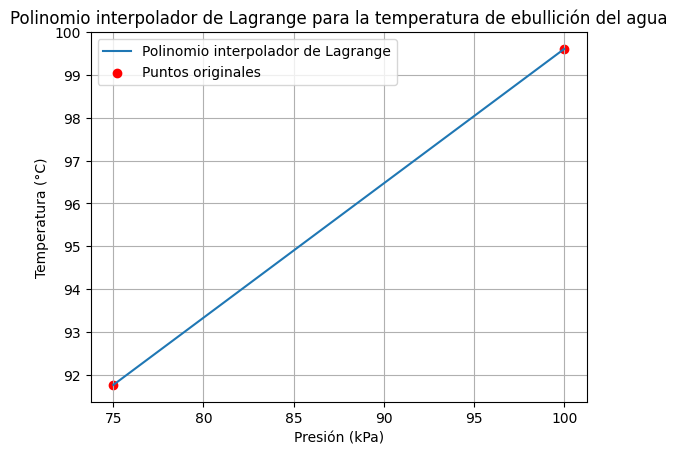

In [34]:
# Crear una función a partir del polinomio interpolador para evaluarla en varios puntos
f_interpolador = sp.lambdify(sp.Symbol('x'), P)

# Crear un rango de valores de x para evaluar el polinomio interpolador
x_range = np.linspace(min(x_values), max(x_values), 1000)

# Evaluar el polinomio interpolador en el rango de x
y_range = f_interpolador(x_range)

# Graficar el polinomio interpolador
plt.plot(x_range, y_range, label='Polinomio interpolador de Lagrange')

# Graficar los puntos originales
plt.scatter(x_values, y_values, color='red', label='Puntos originales')

# Agregar detalles al gráfico
plt.grid()
plt.xlabel('Presión (kPa)')
plt.ylabel('Temperatura (°C)')
plt.title('Polinomio interpolador de Lagrange para la temperatura de ebullición del agua')
plt.legend()

# Mostrar el gráfico
plt.show()